# Фурье

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)

In [2]:
import scipy.fftpack as fft
from scipy.fftpack import ifft

In [3]:
def basic_func(x):
    return np.pi*x * np.sin(2*np.pi*x) # + np.cos(np.pi *x)

In [4]:
def noisy_func(x):
    y = basic_func(x)
    return y + 2 * np.random.randn(len(x))

In [5]:
x = np.linspace(0, 5*np.pi, 150)
y = basic_func(x)
yn = noisy_func(x)

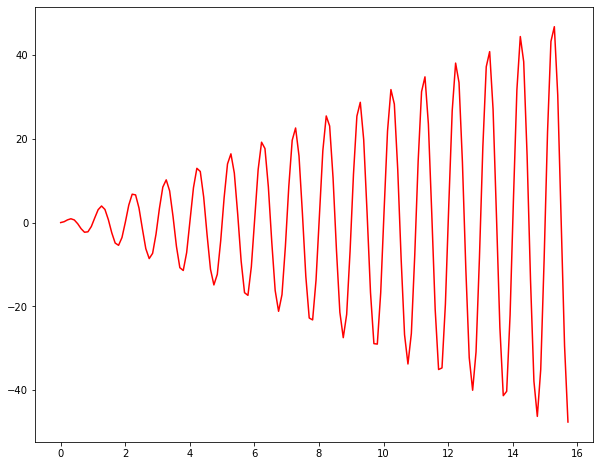

In [6]:
plt.plot(x, y, 'r');

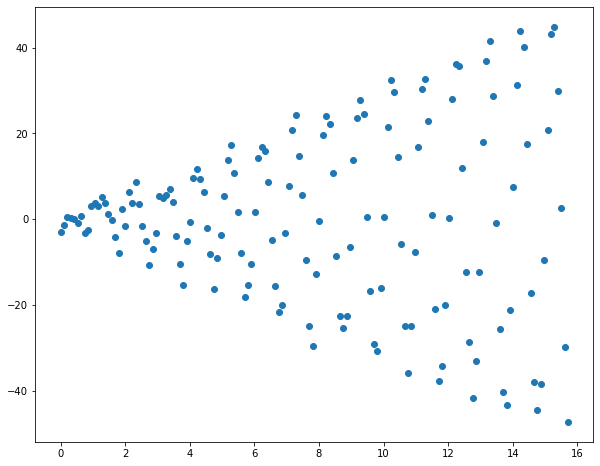

In [7]:
plt.plot(x, yn, 'o');

In [8]:
# Прямое на зашумленных данных
y_fft = fft.fft(yn)

# Обратное
yf = ifft(y_fft)

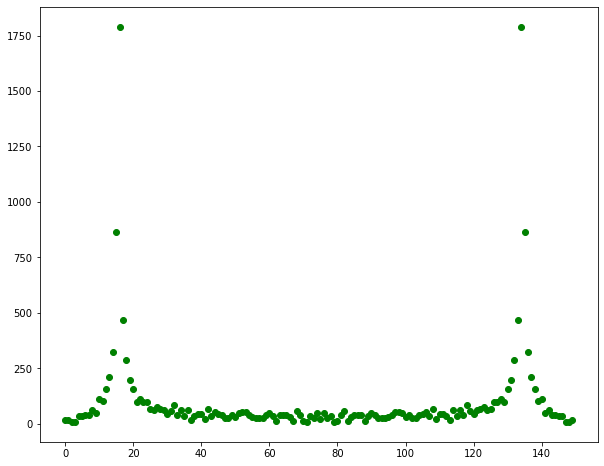

In [9]:
plt.plot(np.abs(y_fft), 'go');

/Users/mir/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


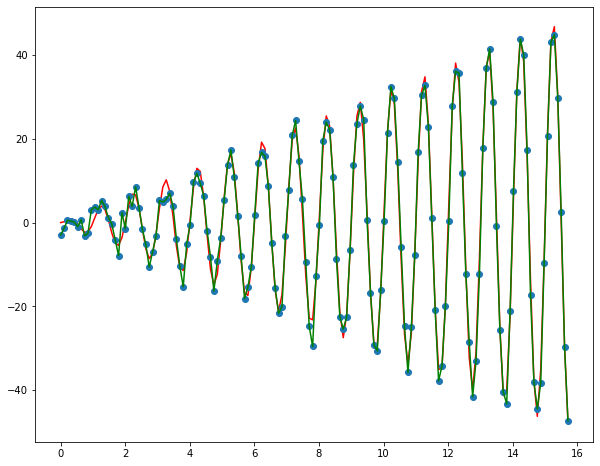

In [10]:
plt.plot(x, y, 'r');
plt.plot(x, yn, 'o');
plt.plot(x, yf, 'g');

# Оконное преобразование Фурье

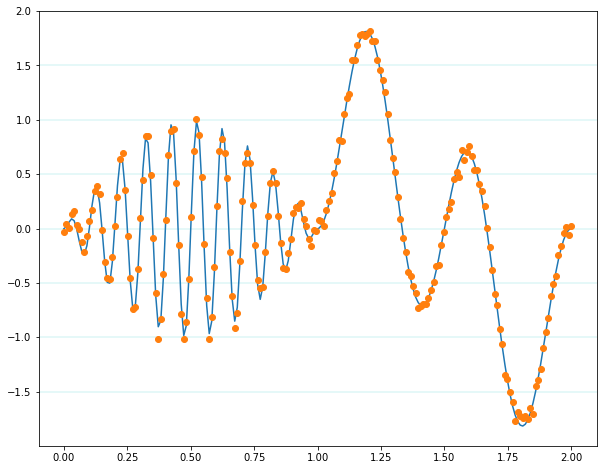

In [11]:
x = np.linspace(0, 2*np.pi, 200)
n = len(x)
L = max(x) - min(x)

y = 0.5*np.cos(19*x) - 0.5*np.cos(21*x)
y[x<np.pi] = 0.5*np.cos(19*x[x<np.pi]) - 0.5*np.cos(21*x[x<np.pi])
y[x>np.pi] = np.cos(5*x[x>np.pi]) - np.cos(x[x>np.pi])
yn = y +0.05*np.random.randn(n)

plt.plot(x/np.pi, y)
plt.plot(x/np.pi, yn, 'o')
plt.grid(axis = 'y', color = 'c', linewidth = 0.2)

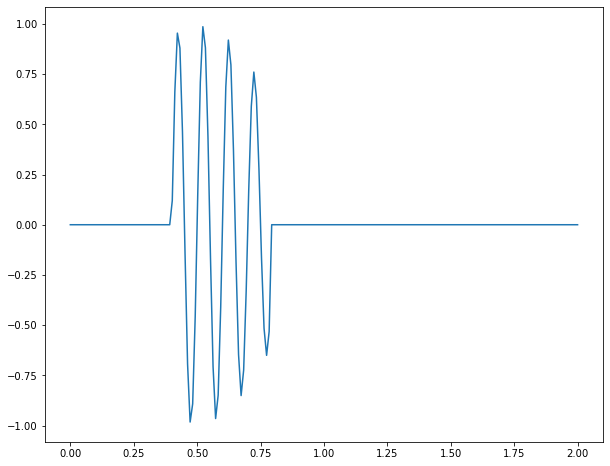

In [12]:
B = np.zeros(n)
dx = L / (n-1)
xw = np.linspace(-L, L, 2*n-1)

Win = np.zeros ((2*n-1))
WinSize = np.pi/5
Win[abs(xw)<WinSize] = 1.0

s = 60

for i in range (0,n-1):      
    B[i] = y[i] * Win[i-s+n]                        
       
plt.plot (x/np.pi, B)

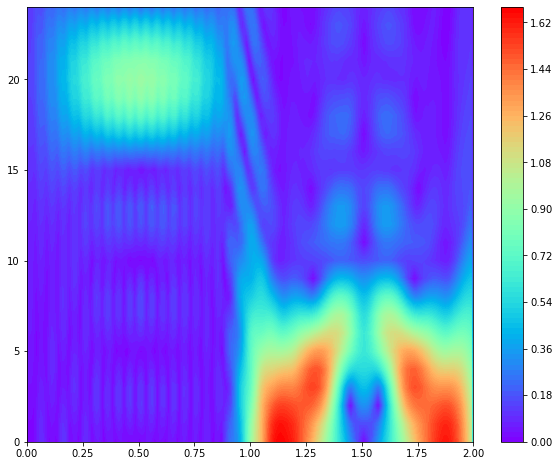

In [13]:
nf = 25

a2 = np.zeros((n,nf))
b2 = np.zeros((n,nf))
A2 = np.zeros((n,nf))

Freq = np.zeros ((len(x)))
Shift = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

for k in range (0,nf):
    
    Freq [k] = k

    for s in range (0,n-1):
        
        Shift[s] = s
    
        a2[s,k]=0.
        b2[s,k]=0.
       
        for i in range (0,n-1):
    
            a2[s,k] +=  2./ WinSize /2 * yn[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
            b2[s,k] +=  2./ WinSize /2 * yn[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx
        
                                   
A2 = (a2**2+b2**2)**0.5 


plt.figure()

plt.contourf(x/np.pi, Freq[0:nf], A2.T, 100, cmap='rainbow')
plt.colorbar();

# Вейвлет

In [14]:
import pywt
from pylab import *

In [15]:
st='db1'

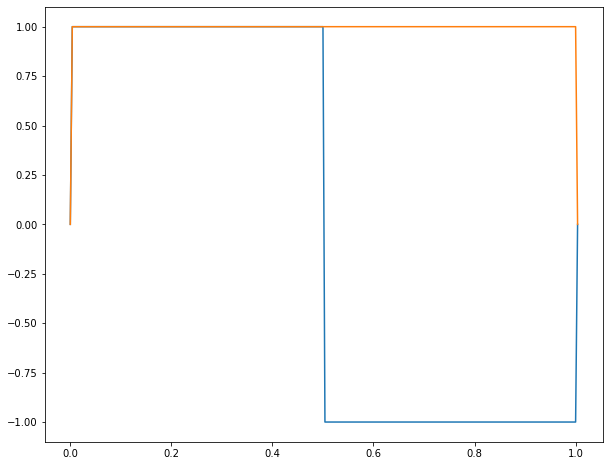

In [16]:
w = pywt.Wavelet(st)
(phi, psi, x) = w.wavefun()
plt.plot (x, psi);
plt.plot (x, phi);

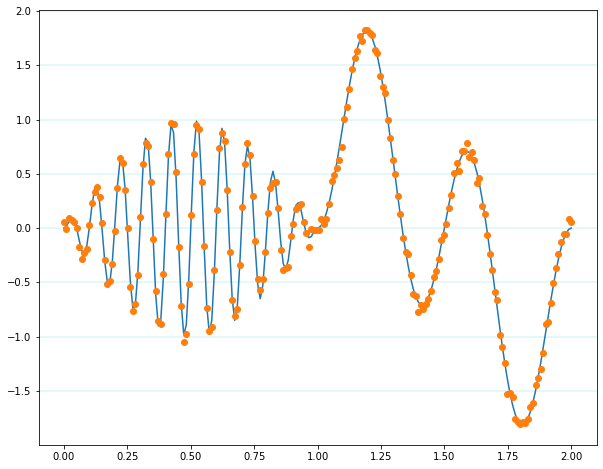

In [17]:
x = np.linspace(0, 2*np.pi, 200)
n = len(x)
L = max(x) - min(x)

y = 0.5*np.cos(19*x) - 0.5*np.cos(21*x)
y[x<np.pi] = 0.5*np.cos(19*x[x<np.pi]) - 0.5*np.cos(21*x[x<np.pi])
y[x>np.pi] = np.cos(5*x[x>np.pi]) - np.cos(x[x>np.pi])
yn = y +0.05*np.random.randn(n)

plt.plot(x/np.pi, y)
plt.plot(x/np.pi, yn, 'o')
plt.grid(axis = 'y', color = 'c', linewidth = 0.2)

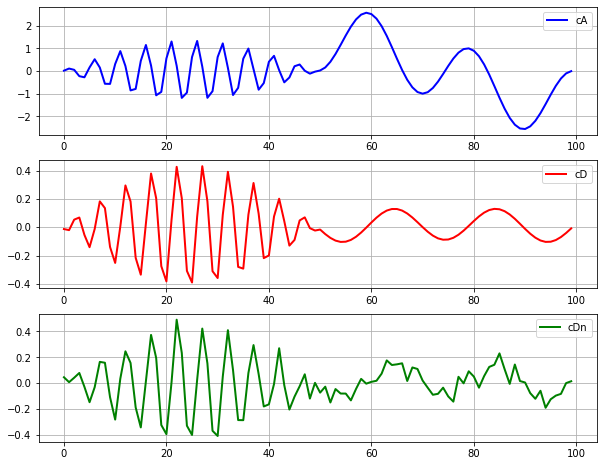

In [18]:
(cA, cD) = pywt.dwt(y,st)
(cAn, cDn) = pywt.dwt(yn,st)
plt.subplot(3, 1, 1)
plt.plot(cA,'b',linewidth=2, label='cA')
plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.plot(cD,'r',linewidth=2, label='cD')
plt.legend()
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(cDn,'g',linewidth=2, label='cDn')
plt.legend()
plt.grid()
plt.show()

In [19]:
def scalogram(data):
    bottom = 0
    vmin = min(map(lambda x: min(abs(x)), data))
    vmax = max(map(lambda x: max(abs(x)), data))
    gca().set_autoscale_on(False)
    for row in range(0, len(data)):
        scale = 2.0 ** (row - len(data))
        imshow(
            array([abs(data[row])]),
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, 1, bottom, bottom + scale])
        bottom += scale

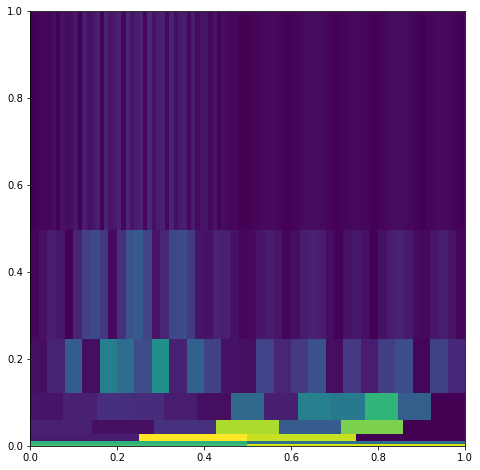

In [20]:
scalogram(pywt.wavedec(y,st))

In [21]:
def BasicFunctionsWavelet (nj, x):

    n = len(x) 
    
    x_left = x[0]; x_right = x[n-1]
    
    nf = 0
    
    for j in range (0, nj):
        nk = 2**j
        nf = nf + nk
    
       
    L = x_right - x_left

    PhiFunArray = np.zeros((n, nf+1))
                       
    PhiFunArray[:,nf] = 1.
    
    jk = -1
    
    for j in range (0, nj):
        nk = 2**j
        for k in range (0, nk):
            jk = jk+1
            for i in range(0,n):
                PhiFunArray[i,jk] = BFW (x[i], j, k, x_left, x_right)            
    return PhiFunArray

def BFW (xi, j, k, x_left, x_right):
    L = x_right - x_left
    Phijk=2.**(j/2)*WaveletHaar (2**j*(xi-x_left)/L-k)
    return Phijk
    
def WaveletHaar(x):
    x_left = 0.; L=1
    W = 0.
    if (x>=x_left and x<x_left+L/2):
        W = 1.
    if (x>=x_left+L/2 and x<=x_left+L):
        W = -1
    return W

In [22]:
nj = 7

Phi = BasicFunctionsWavelet (nj, x)
   
a = np.linalg.solve(Phi.T @ Phi, Phi.T @ y)

jk = -1
Nk = 2 ** (nj-1)

Cw = np.zeros((nj, Nk))
Cf = np.zeros((n, nj))

Lscale = np.zeros(nj)
Ltrans = np.zeros(Nk)

for k in range (0, Nk):
    Ltrans[k] = k

for j in range (0, nj):
    Lscale[j] = j
    nk = 2 ** j
    
    for k in range (0, nk):
        jk = jk + 1
        Cw[j,k] = a[jk]
        for i in range (0, n):
            if (x[i] >= x[0] + k * L / 2**j and x[i] < x[0] + (k + 1) * L / 2 ** j):
                Cf[i, j] = a[jk]

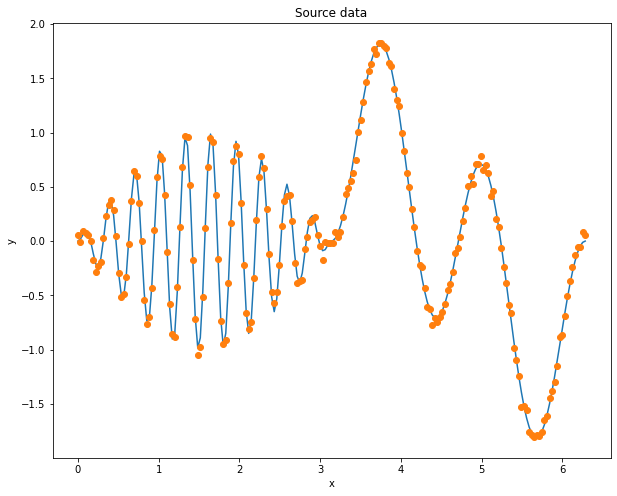

In [23]:
plt.title ('Source data') 
plt.xlabel ('x')
plt.ylabel ('y')
plt.plot(x, y)
plt.plot(x, yn, 'o')

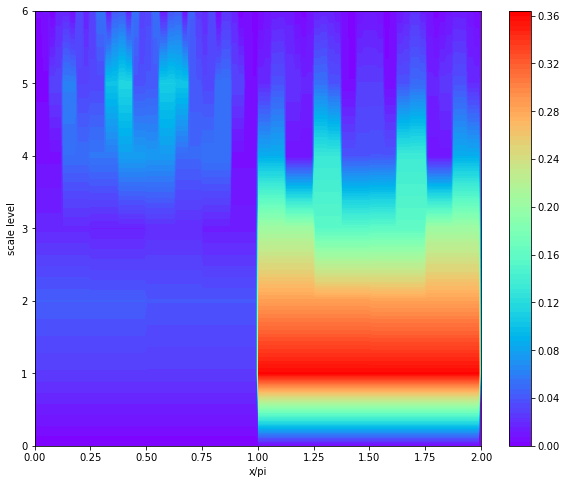

In [24]:
plt.xlabel ('x/pi')
plt.ylabel ('scale level')
plt.contourf(x/np.pi, Lscale, abs(Cf.T), 100, cmap='rainbow')
plt.colorbar();